In [472]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#statsmodels modules for anova
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

#scikit-learn preprocessing libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import precision_score,plot_precision_recall_curve,accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer,make_column_selector,make_column_transformer
from sklearn import set_config
from sklearn.preprocessing import FunctionTransformer
import sklearn


#ols libraries
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

# Inferencial Stats

In [473]:
df = pd.read_csv("cleaned_data.xlsx")

In [474]:
anova_ie = ols("i_c_t ~ C(schtype) * C(gender)", data=df).fit()

anova__ie_table = anova_lm(anova_ie,typ = 2)

In [36]:
anova__ie_table

,sum_sq,df,F,PR(>F)
C(schtype),1461.338846,1.0,578.174522,2.096918e-117
C(gender),70.268891,1.0,27.801685,1.435140e-07
C(schtype):C(gender),3.868186,1.0,1.530437,2.161395e-01
Residual,7933.837386,3139.0,NaN,NaN


In [37]:
anova = ols("i_c_t ~ C(schtype) + C(gender)", data=df).fit()

anovatable = anova_lm(anova,typ = 2)
anova_table

NameError: name 'anova_table' is not defined

In [ ]:
spector_data = sm.datasets.spector.load_pandas()

In [ ]:
spector_data.exog.head()

,GPA,TUCE,PSI
0,2.66,20.0,0.0
1,2.89,22.0,0.0
2,3.28,24.0,0.0
3,2.92,12.0,0.0
4,4.00,21.0,0.0


In [ ]:
dep = df[['mathematics',"integrated_science"]]

In [ ]:
import statsmodels.api as sm

dep_plus_constant = sm.add_constant(dep)

# Logit Model
logit_mod = sm.Logit(df["i_c_t"], dep_plus_constant,)

logit_res = statsmodels.discrete.discrete_model.MNLogit.fit()
# Optimization terminated successfully.
#          Current function value: 0.402801
#          Iterations 7

print(logit_res.summary())

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


ValueError: endog must be in the unit interval.

In [ ]:
sns.load_dataset("iris")['species'].nunique()

3

In [ ]:
import statsmodels.api as st

dep_plus_constant = sm.add_constant(dep)
mdl = st.MNLogit(df['i_c_t'], dep_plus_constant)
 
mdl_fit = mdl.fit()
mdl_fit.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 1.438243
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                  i_c_t   No. Observations:                 3143
Model:                        MNLogit   Df Residuals:                     3119
Method:                           MLE   Df Model:                           16
Date:                Mon, 28 Mar 2022   Pseudo R-squ.:                  0.2463
Time:                        16:29:57   Log-Likelihood:                -4520.4
converged:                       True   LL-Null:                       -5997.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
           i_c_t=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4441      0.672     -2.148      0.032      -2.762      -0.126
mathematics            0.5285      0.215      2.453      0.014       0.106       0.951
integrated_science     0.2851      0.319      0.895      0.371      -0.339       0.909
--------------------------------------------------------------------------------------
           i_c_t=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.3854      0.670     -3.562      0.000      -3.698      -1.073
mathematics            0.5670      0.209      2.718      0.007       0.158       0.976
integrated_science     0.7954      0.306      2.603      0.009       0.197       1.394
--------------------------------------------------------------------------------------
           i_c_t=4       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.5972      0.687     -5.236      0.000      -4.944      -2.251
mathematics            0.6970      0.207      3.363      0.001       0.291       1.103
integrated_science     1.1402      0.303      3.760      0.000       0.546       1.735
--------------------------------------------------------------------------------------
           i_c_t=5       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.1947      0.704     -7.374      0.000      -6.575      -3.814
mathematics            0.9043      0.207      4.367      0.000       0.498       1.310
integrated_science     1.4494      0.303      4.786      0.000       0.856       2.043
--------------------------------------------------------------------------------------
           i_c_t=6       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -8.4078      0.748    -11.246      0.000      -9.873      -6.942
mathematics            1.1439      0.210      5.455      0.000       0.733       1.555
integrated_science     1.8374      0.304      6.035      0.000       1.241       2.434
--------------------------------------------------------------------------------------
           i_c_t=7       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1411      0.790    -15.376      0.000     -13.689     -10.593
mathematics            1.3102      0.212      6.195      0.000       0.896       1.725
integrated_science     2.2828      0.306      7.462      0.000       1.683       2.882
--------------------------------------------------------------------------------------
           i_c_t=8    

In [ ]:
dummies = pd.get_dummies(df.loc[:,df.columns!='circuit'],drop_first=True)
dummies.head()

In [ ]:
circuit = pd.get_dummies(df["circuit"],drop_first=False)
circuit = circuit.drop(columns=["YAMORANSA"],axis =1) #drop YAMORANSA from the encoded columns

In [ ]:
#concatenate circuit and the other encoded columns (dummies)

df_ols = pd.concat([circuit,dummies],axis = 1)

df_ols.columns = [x.lower() for x in df_ols.columns] #change all upper case column names to lower case
df_ols.columns = [column.replace(" ","_") for column in df_ols.columns]    #get rid of all whitespaces in column names

df_ols.head()

In [ ]:
scaler = StandardScaler()

In [ ]:
new_df = scaler.fit_transform(df_ols)

In [ ]:
df_ols = pd.DataFrame(new_df,columns=df_ols.columns)

In [ ]:
df_ols.columns

In [ ]:
model = smf.ols(formula="i_c_t~age+anomabo_a+anomabo_b+mankessim_a+mankessim_b+mdominase+saltpond_a+saltpond_b+schtype_public+gender_m+mathematics+english_language",data = df_ols).fit()

In [ ]:
model.summary()

In [ ]:
model2 = smf.ols(formula="i_c_t~schtype_public+gender_m+mathematics+english_language",data = df_ols).fit()

In [ ]:
model2.summary()

# Machine Learning Inference

## Data Preprocessing

In [475]:
df = df.drop(columns = df.iloc[:,[0]].columns)
df.head()

,cid,social_studies,integrated_science,i_c_t,r_m_e,fante,mathematics,english_language,b_d_t,schtype,age,gender,circuit,aggregate
0,302063052,1,1,1,2,2,1,2,2,PRIVATE,15.0,M,SALTPOND B,8.0
1,302063055,1,2,4,4,4,5,3,3,PRIVATE,15.0,F,SALTPOND B,18.0
2,302156005,1,3,5,2,3,4,5,5,PUBLIC,19.0,M,MANKESSIM A,18.0
3,302063042,1,1,2,2,2,2,1,2,PRIVATE,16.0,M,SALTPOND B,9.0
4,302148014,1,4,6,3,2,5,4,4,PUBLIC,17.0,M,MDOMINASE,19.0


In [500]:
y = df['i_c_t']
X = df.iloc[:,df.columns!='i_c_t'].drop(columns ='cid')

In [501]:
X.head()

,social_studies,integrated_science,r_m_e,fante,mathematics,english_language,b_d_t,schtype,age,gender,circuit,aggregate
0,1,1,2,2,1,2,2,PRIVATE,15.0,M,SALTPOND B,8.0
1,1,2,4,4,5,3,3,PRIVATE,15.0,F,SALTPOND B,18.0
2,1,3,2,3,4,5,5,PUBLIC,19.0,M,MANKESSIM A,18.0
3,1,1,2,2,2,1,2,PRIVATE,16.0,M,SALTPOND B,9.0
4,1,4,3,2,5,4,4,PUBLIC,17.0,M,MDOMINASE,19.0


In [478]:
y[:5]

0    1
1    4
2    5
3    2
4    6
Name: i_c_t, dtype: int64

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cid                 3143 non-null   int64  
 1   social_studies      3143 non-null   int64  
 2   integrated_science  3143 non-null   int64  
 3   i_c_t               3143 non-null   int64  
 4   r_m_e               3143 non-null   int64  
 5   fante               3143 non-null   int64  
 6   mathematics         3143 non-null   int64  
 7   english_language    3143 non-null   int64  
 8   b_d_t               3143 non-null   int64  
 9   schtype             3143 non-null   object 
 10  age                 3143 non-null   float64
 11  gender              3143 non-null   object 
 12  circuit             3143 non-null   object 
 13  aggregate           3143 non-null   float64
dtypes: float64(2), int64(9), object(3)
memory usage: 343.9+ KB


In [502]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3,stratify=y,random_state = 111)

In [503]:
X_test.size/X.size

0.3000318167356029

In [504]:
print("size of traininig features : {}{}".format( round( (X_train.size/X.size)*100, 2), "%") )
print("size of testing features   : {}{}".format( round( (X_test.size/X.size)*100, 2), "%" ) )

size of traininig features : 70.0%
size of testing features   : 30.0%


In [598]:
def transformer(column,encoder,train:bool = True):
    """preprocess input data and return a dataframe with the corresponding labels"""
    """function returns an a dataframe and an encoder used in preprocessing if train given"""
    
    if train == True:
         x = encoder.fit_transform(column)
    else:
        try:
         x = encoder.transform(column)  
        except NotFittedError:
             print("Data Has Not Been Fitted Yet")
             return None
    
    if isinstance(encoder,sklearn.preprocessing.OneHotEncoder):
        x = pd.DataFrame(x,columns = list(encoder.get_feature_names_out(encoder.feature_names_in_))) 
    else:
        x = pd.DataFrame(x,columns = column.columns)
        
    x = x.astype("int")
    
    return (x,encoder) if train else x

In [599]:
circuit_order = list(df['circuit'].value_counts().index)

In [600]:
#One Hot Encoding
ohe = OneHotEncoder(categories = [['PRIVATE','PUBLIC'],["M","F"],circuit_order],
                   drop = np.array(["PRIVATE","F","YAMORANSA"]),sparse = False)

#Ordinal Encoding
oe = OrdinalEncoder(categories=[['PRIVATE','PUBLIC'],["M","F"],circuit_order],handle_unknown='error')

In [601]:
train,oe = transformer(X_train.select_dtypes("O"),encoder = oe,train = True)
test = transformer(X_test.select_dtypes("O"),encoder = enc,train = False)

ValueError: Shape mismatch: if categories is an array, it has to be of shape (n_features,).

In [594]:
train

,schtype,gender,circuit
0,1,1,3
1,1,1,4
2,1,1,4
3,1,1,3
4,0,1,2
...,...,...,...
2195,1,0,2
2196,0,0,1
2197,1,1,1
2198,1,0,6


In [595]:
test

,schtype,gender,circuit
0,1,1,3
1,1,1,4
2,1,1,4
3,1,1,3
4,0,1,2
...,...,...,...
2195,1,0,2
2196,0,0,1
2197,1,1,1
2198,1,0,6


In [487]:
df['schtype'].unique()

array(['PRIVATE', 'PUBLIC'], dtype=object)

## Feature Importance

In [520]:
model = RandomForestClassifier(n_estimators = 400,criterion = 'entropy')
model.fit(X_train_oe,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400)

In [521]:
model.feature_importances_

array([0.0909287 , 0.09822686, 0.07185445, 0.07381299, 0.06609019,
       0.07697045, 0.09655512, 0.02743173, 0.07908346, 0.03215203,
       0.09296123, 0.1939328 ])

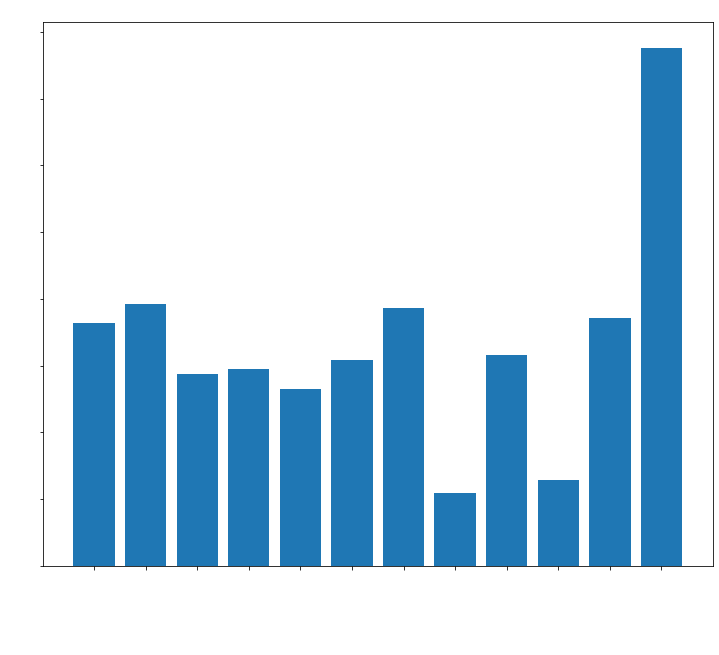

In [531]:
plt.figure(figsize = (12,10))
plt.bar(X_train_oe.columns,model.feature_importances_)
plt.xticks(rotation = 45,color ='white');
plt.yticks(color = 'white')
plt.title("Feature Importance",color = 'white');

In [ ]:
model.score()